# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
# импортирую библиотеку pandas как главного инструмента для анализа структурных данных и временных рядов
import pandas as pd
from pandas.util.testing import assert_frame_equal
# импортирую библиотеку seaborn как главного инструмента для визуализации
import seaborn as sns
# импортирую библиотеку matplotlib для работы с двумерными графиками
import matplotlib.pyplot as plt
# выберу стиль для plt инструментов
plt.style.use('ggplot')

# импортирую библиотеку scipy для выполнения математических, научных и инженерных расчётов
from scipy import stats as st
# импортирую библиотеку для работы со временем
from datetime import datetime
# импортирую библиотеку для работы с массивами данных. NumPy - основополагающая библиотека, необходимая для научных вычислений
import numpy as np
# импортирую библиотеку и инструменты Scikit-learn - интегратора классических алгоритмов машинного обучения
# алгоритм классификации дерева решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# алгоритм классификации случайный лес
from sklearn.ensemble import RandomForestClassifier
# алгоритм классификации логическая регрессия
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

/tmp/ipykernel_55/4021714176.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# открываем файлы, создаем переменные
df_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
# рассмотрим первые пять строк во фрейме данных в переменной df_train
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# посмотрим, для более полного первичного представления, последние его 10 строк
df_train.tail(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
14139,2018-08-18 01:59:59,3.236759,11.692898,6.745979,46.225130,73.265872,8.895144,3.425167,10.118103,1.611159,...,23.015413,-501.287519,20.057415,-499.600478,17.985857,-500.239983,12.974452,-499.879930,19.988701,-501.037332
14140,2018-08-18 02:59:59,3.187398,11.423128,6.790500,46.801679,68.369674,9.043962,3.629573,10.037518,1.838214,...,23.017115,-501.665249,20.044418,-500.415095,18.026001,-499.866058,13.001740,-499.914235,20.005963,-500.767097
14141,2018-08-18 03:59:59,2.925574,10.855586,7.053796,47.765393,64.054699,8.578502,3.365823,10.603464,1.761994,...,23.030949,-501.196721,20.034440,-499.842047,18.001504,-499.872052,12.998309,-500.027809,20.007108,-500.850685
14142,2018-08-18 04:59:59,3.076566,11.542302,6.929418,46.956275,68.643324,8.792890,3.120351,10.184715,1.567363,...,23.033246,-500.912210,19.988437,-500.125966,18.011724,-500.090861,13.007108,-500.258238,19.983872,-502.581707
14143,2018-08-18 05:59:59,3.192996,11.612338,6.824441,46.710119,74.817644,8.665858,2.938592,10.241498,1.393077,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
14148,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


In [5]:
# пришло время получить общую информацию о данных в таблице df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


**информация из описания данных:**

*Таблица df_train (обучающая выборка)Технологический процесс:*
- Rougher feed — исходное сырье

- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

- Xanthate — ксантогенат (промотер, или активатор флотации);

- Sulphate — сульфат (на данном производстве сульфид натрия);

- Depressant — депрессант (силикат натрия).

- Rougher process (англ. «грубый процесс») — флотация

- Rougher tails — отвальные хвосты

- Float banks — флотационная установка

- Cleaner process — очистка

- Rougher Au — черновой концентрат золота

- Final Au — финальный концентрат золота

<div style="border:solid DarkCyan 3px; padding: 20px"> Сравним информацию о фрейме данных df_train с информацияей из описания и определим первые важные выводы для дальнейшей работы. Общее описание содержит сведения, что в фрейме данных df_train 87 столбцов! и 14149 строк:

1) по типу данных столбец date — дата представлен в типе данных - object , это минус, полагаю, что нужно представить указанные данные в datatime. В остальных столбцах к типу данных - float  вопросов нет. 
    
2) пропуски очевидны и их очень много. Необходимо детально разбираться с ними и определять план действий.

3) после решения двух предыдущих проблем необходимо проверить фрейм данных на наличие дубликатов.
</div>

In [6]:
# рассмотрим первые пять строк во фрейме данных в переменной df_test
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
# рассмотрим последние пять строк во фрейме данных в переменной df_test
df_test.tail()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5285,2017-12-31 19:59:59,173.957757,15.963399,8.07,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.07,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284
5289,2017-12-31 23:59:59,181.556856,14.995850,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,...,20.034715,-500.728588,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937


In [8]:
# получим общую информацию о данных в таблице df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [9]:
# проведем перчичный визуальный осмотр фрейма данных df_full
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
# перейдем к общей информации
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


<div style="border:solid DarkCyan 3px; padding: 20px"> В дополнение к ранее обозначенным выводам следует добавить следующее:

1) столбец date — дата, представлен в типе данных - object во всех фреймах данных - нужно представить указанные данные в datatime. В остальных столбцах к типу данных - float  вопросов нет. 
    
2) пропуски в датафреймах df_train и df_full очевидны и их также как и в df_test очень много. 

3) в фрейме данных df_full установлено 19439 строк, превышающие количество строк в датафреймах df_train, df_test  (по 14149).

4) в фремах данных df_train, df_full количество фичей - 87, в фрейме df_test - 53, нужно разобраться какие фичи приоритетные в рамках research.
</div>

### План действий по предобработке данных

*С учетом полученных выводов после первичного осмотра данных прежде всего необходимо учесть Инструкцию по выполнению проекта, чтобы наметить подходы по выполнению операции с фреймами данных:*

- проверить, что эффективность обогащения рассчитана правильно. Вычислить её на обучающей выборке для признака rougher.output.recovery. Найти MAE между вашими расчётами и значением признака. Описать выводы.
- проанализировать признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
- провести предобработку данных.

**Проверка эффективности обогащения, проведения приваильного рассчета**

*В разделе модуля Технологический процесс установлено, что нужно смоделировать процесс восстановления золота из золотосодержащей руды по формуле: recovery=(С*(F-T)/F*(C-T))*100%, где:*
где:

- recovery это (с англ. восстановление), искомое значение 
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

*Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат*

*Рассмотрим информацию из описания данных, чтобы понять какие фичи в датафрейме обучающая выборка (я ее обозначил в проводимом исследовании как df_train) являются C, F, T. Мы можем увидеть, что в обучающем фреме данных есть 47-ый столбец, который содержит данные о грубом выходе концентрате золота -  rougher.output.concentrate_au и представляется, что это применительно к нашей формуле и есть значение - C*

*Далее по аналогии поищем долю золота в сырье/концентрате до флотации/очистки в обучающем фрейме данных. Мы можем увидеть в df_train.info() 39 столбец rougher.input.feed_au, в переводе на русский грубая входная подача золота, полагаю, что это и есть искомый F применительно к формуле*

*Поищем долю золота в отвальных хвостах после флотации/очистки, предполагаю, что это 52 столбец rougher.output.tail_au - более грубый выходной хвост золота*

*Итак, мы нашли для нашей формулы значения C, F, T в обучающем фрейме данных df_train, что можно сказать об этих отдельных столбцах, 47-ой столбец содержит 14149 данных, 39-ый столбец - 14149, 52-ой столбец содержит - 14149, наборы данных в строках одинаковы, это здорово*

In [11]:
# убедимся, что 'NaN' не содержится в столбцах датафреймов
df_train['rougher.output.concentrate_au'].isna().sum()

0

In [12]:
df_train['rougher.input.feed_au'].isna().sum()

0

In [13]:
df_train['rougher.output.tail_au'].isna().sum()

0

In [14]:
# рассмотреим дата сет на предмет наличия явных дубликатов
(df_train.duplicated().sum())

0

*Из условий задачи в обучающей выборке уже есть признаки rougher.output.recovery и педлагается проверить верность этих данных в столбце rougher.output.recovery, в этой связи построим формулу и спользованием значений C, F, T*

In [15]:
df_train['rougher.output.recovery'].isna().sum()

0

In [16]:
# присвоим переменным C, F, T найденные значения в столбцах 
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

<b>Совет: </b> Задался вопросом как прописать переменные C, F, T  и здесь вспомнил ценный полученный совет. Полагаю, что использовать следует правила применительно к написанию констант. Соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

In [17]:
# после того как мы создали переменные C, F, T мы можем прописать нашу формулу
# так и назовем переменную искомое recovery
recovery = ((C * (F - T)) / (F * (C - T))) * 100
# создам для сравнения переменную df_recovery и залью туда данные столбца df_train['rougher.output.recovery']
df_recovery = df_train['rougher.output.recovery']

*теперь можно провести сравнение данных в обучающем фрейме данных rougher.output.recovery и полученных расчетов в переменной recovery*



<Figure size 1008x504 with 0 Axes>

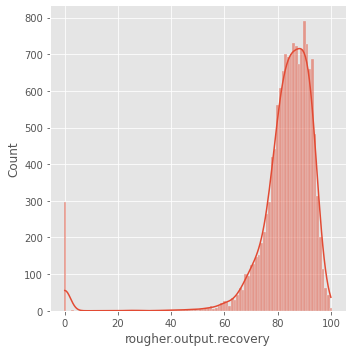

In [18]:
# построим гистограммы в широко используемой библиотеке визуализации Сиаборн, для начала исходные данные
plt.figure(figsize = (14,7))
sns.displot(df_recovery, discrete = True, kde = True)
plt.show()

<Figure size 1008x504 with 0 Axes>

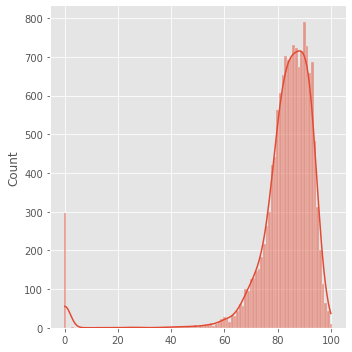

In [19]:
# полученные данные в формуле
plt.figure(figsize = (14,7))
sns.displot(recovery, discrete = True, kde = True)

plt.show()

<b> Ссылка: </b> Распределение плотностей хорошо представлены для построения гистрограмм в качестве напоминания материала в статье: https://pythobyte.com/seaborn-distribution-histogram-plot-tutorial-and-examples-f615b17b/
</div>

In [20]:
# далее необходимо найти MAE между полученными расчётами и значением признака. Описать выводы.
#  MAE, является одним из показателей для обобщения и оценки качества модели машинного обучения
#  MAE определяет ошибку прогнозирования → Фактическое значение - Прогнозируемое значение
# предварительно в библиотеке from sklearn.metrics импортировал функцию mean_absolute_error

In [21]:
print('MAE:', mean_absolute_error(df_recovery, recovery))

MAE: 9.73512347450521e-15


###### Описание выводов:  Мы видим, что гистрограммы абсолютно идентичны, а это значит, что проведенные расчеты по формуле соответствуют данным в столбце rougher.output.recovery. Кроме того, функция mean_absolute_error показала минимальное значение среднего абсолютного отклонениями между значениями df_recovery, recovery, что говорит о правильности вывода по гистограммам.

*Далее следует проанализировать признаки, недоступные в тестовой выборке. Ответить на вопросы: Что это за параметры? К какому типу относятся?*

*Шаг 1. Осмотр тестовой выборки, выявление недоступных признаков*

- тестовая выборка у меня в датафреме df_test, открыл информационное описание датафрейма и вижу 53 фичей,  

- пропущенные значения установлены в столбцах: primary_cleaner.input.sulfate - 4; primary_cleaner.input.depressant - 5; primary_cleaner.input.xanthate- 4; rougher.input.feed_rate - 3; rougher.input.feed_size - 1; rougher.input.feed_sol - 21; rougher.input.floatbank11_sulfate - 8; rougher.input.floatbank11_xanthate - 25; secondary_cleaner.state.floatbank2_a_air - 3; secondary_cleaner.state.floatbank3_a_air - 9.

**Краткий вывод в отличии от df_train и df_full, в которых как мы ранее установили по 87 фичей, в df_test не хватает 34 признака...**

In [22]:
87-53

34

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [24]:
# осмотр 'NaN' в фрейме 
df_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

*Шаг 2. Что это за параметры? К какому типу относятся?*

*Мы установили в Шаге 1 - 34 отсутствующих признака в df_test* 

In [25]:
# убедимся с использованием функции  assert_frame_equal в библиотеке pandas и проверим утверждение, что фреймы не равны 
# в случае если фреймы разные применим методы shape
try:
    assert_frame_equal(df_train, df_test)
except:
    print('Ошибка, фреймы разные, посмотрим с помощью метода shape:')
finally:
    print(df_train.shape)
    print(df_test.shape)

Ошибка, фреймы разные, посмотрим с помощью метода shape:
(14149, 87)
(5290, 53)


*Визуально сравнивая df_train и df_test мы можем увидеть, что в df_test отсутствуют такие фичи как:*
- 1   final.output.concentrate_ag                         19438 non-null  float64
- 2   final.output.concentrate_pb                         19438 non-null  float64
- 3   final.output.concentrate_sol                        19228 non-null  float64
- 4   final.output.concentrate_au                         19439 non-null  float64
- 5   final.output.recovery                               19439 non-null  float64
- 6   final.output.tail_ag                                19438 non-null  float64
- 7   final.output.tail_pb                                19338 non-null  float64
- 8   final.output.tail_sol                               19433 non-null  float64
- 9   final.output.tail_au                                19439 non-null  float64
 
- 14  primary_cleaner.output.concentrate_ag               19439 non-null  float64
- 15  primary_cleaner.output.concentrate_pb               19323 non-null  float64
- 16  primary_cleaner.output.concentrate_sol              19069 non-null  float64
- 17  primary_cleaner.output.concentrate_au               19439 non-null  float64
- 18  primary_cleaner.output.tail_ag                      19435 non-null  float64
- 19  primary_cleaner.output.tail_pb                      19418 non-null  float64
- 20  primary_cleaner.output.tail_sol                     19377 non-null  float64
- 21  primary_cleaner.output.tail_au 
- 30  rougher.calculation.sulfate_to_au_concentrate       19437 non-null  float64
- 31  rougher.calculation.floatbank10_sulfate_to_au_feed  19437 non-null  float64
- 32  rougher.calculation.floatbank11_sulfate_to_au_feed  19437 non-null  float64
- 33  rougher.calculation.au_pb_ratio                     19439 non-null  float64
- 44  rougher.output.concentrate_ag                       19439 non-null  float64
- 45  rougher.output.concentrate_pb                       19439 non-null  float64
- 46  rougher.output.concentrate_sol                      19416 non-null  float64
- 47  rougher.output.concentrate_au                       19439 non-null  float64
- 48  rougher.output.recovery                             19439 non-null  float64
- 49  rougher.output.tail_ag                              19438 non-null  float64
- 50  rougher.output.tail_pb                              19439 non-null  float64
- 51  rougher.output.tail_sol                             19439 non-null  float64
- 52  rougher.output.tail_au                              19439 non-null  float64
- 65  secondary_cleaner.output.tail_ag                    14147 non-null  float64
- 66  secondary_cleaner.output.tail_pb                    14139 non-null  float64
- 67  secondary_cleaner.output.tail_sol                   12544 non-null  float64
- 68  secondary_cleaner.output.tail_au

In [26]:
# убедимся, что визуально были правильно определены признаки путем удаления в df_train всех фичей, которые есть в df_test
# для удаления используем инстурмент drop
# создадим отедльную переменную с фреймом данных фичей, которые не предусмотрены в df_test
product_parameters = df_train.columns.drop(df_test.columns)

In [27]:
# построим df_train[product_parameters] с помощью info 
df_train[product_parameters].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


*Ответ на вопрос каких параметров нет в тестовой выборке: отсутсвуют финальные характеристики параметров продуктов ag(серебра), pb(свинца), sol(солей), au (золота); финальная характеристика восстановления; финальные характеристики отвальных хвостов соответствено; данные о первичной очистки параметров продукта; флотация расчетные характеристики сульфид натрия, флотационной установки; флотация параметров продуктов;  флотация параметров продуктов  отвальных хвостов; вторичная очистка параметров продуктов отвальных хвостов*

*Данный ответ объясняется тем, что для обучения модели мы можем использовать только постоянные во времени признаки, которые нам доступны в момент, когда потребуется предсказание. Другими словами, во временных рядах нас не интересуют данные, которые содержат выводы  по параметрам продуктов, поскольку они меняются со временем. И в момент использования модели параметры продуктов могут содержать разные значения, совершенно разные и непредсказуемые показатели* 

In [28]:
# с учетом полученного ответа на вопрос удалим все фичи в df_train, которые содержат параметры продуктов, за исключ. целевых
df_train_project = product_parameters.drop(['final.output.recovery', 'rougher.output.recovery'])

In [29]:
df_train_project_2 = df_train.columns.drop(df_train_project)

In [30]:
df_train = df_train[df_train_project_2]

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   final.output.recovery                       14149 non-null  float64
 2   primary_cleaner.input.sulfate               14129 non-null  float64
 3   primary_cleaner.input.depressant            14117 non-null  float64
 4   primary_cleaner.input.feed_size             14149 non-null  float64
 5   primary_cleaner.input.xanthate              14049 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 10  primary_cl

In [32]:
# очистим от NaN строки во всем фрейме данных, которые встречаются по показателю, где более всего установлено NaN
df_train.dropna(subset = ['primary_cleaner.input.xanthate'], inplace = True, axis=0)

In [33]:
df_train.shape

(14049, 55)

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14049 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14049 non-null  object 
 1   final.output.recovery                       14049 non-null  float64
 2   primary_cleaner.input.sulfate               14041 non-null  float64
 3   primary_cleaner.input.depressant            14024 non-null  float64
 4   primary_cleaner.input.feed_size             14049 non-null  float64
 5   primary_cleaner.input.xanthate              14049 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      14049 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    14049 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      14049 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    14049 non-null  float64
 10  primary_cl

In [35]:
df_train.reset_index(drop=True, inplace=True)

In [36]:
df_test.shape

(5290, 53)

*В тестовой выборке нам не хватает двух целевых признаков 'final.output.recovery', 'rougher.output.recovery'*

In [37]:
# создадим переменную target_features и заимствуем по общему для всех фреймов date наши целевые показатели из df_full
target_features = df_full[['date', 'final.output.recovery', 'rougher.output.recovery']]

In [38]:
# объеденим методом join фреймы данных
df_test = df_test.join(target_features.set_index('date'), on='date')

In [39]:
# посмотрим, что получилось
df_test.shape

(5290, 55)

*Попробуем очистить от NaN тестовую выборку и посмтреть ее готовность*

In [40]:
df_test['final.output.recovery'].isna().sum()

0

In [41]:
df_test['rougher.output.recovery'].isna().sum()

0

*Проблем с NaN не установлено, можно продолжить исследование данных*

In [42]:
# посотрим на фрейм данных df_full
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [43]:
# много значений NaN необходимо заменить
df_full = df_full.fillna(method='ffill')

In [44]:
# убедимся, что все ок
df_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [45]:
# такой же метод использую для NaN значений в df_test
df_test = df_test.fillna(method='ffill')

In [46]:
# убедимся, что все ок
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [47]:
# тоже самое сделаем с df_train
df_train = df_train.fillna(method='ffill')

In [48]:
# убедимся, что все ок
df_train.isna().sum()

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

In [49]:
#избавимся от пропусков в столбце rougher.output.recovery
df_train.dropna(subset = ['rougher.output.recovery'], inplace = True)

In [50]:
df_test.dropna(subset = ['rougher.output.recovery'], inplace = True)

In [51]:
df_full.dropna(subset = ['rougher.output.recovery'], inplace = True)

## Анализ данных

### Проведем исследование изменения концентрации элементов на каждом этапе

*Необходимо определить основные этапы изменений концентрации элементов ag(серебра), pb(свинца), sol(солей), au (золота):*
- 'rougher.input.feed_', флотация параметров исходного сырья 
- 'rougher.output.concentrate_', флотация параметров концентрации продукта 
- 'primary_cleaner.output.concentrate_', первичная очистка параметров концентрации продукта 
- 'final.output.concentrate_', финальные характеристики параметров концентрации продукта 

*Для проведения анализа данных нам не нужны все 87 фичей, на нужны только показатели фичей четырех вышеуказанных параметров, для решения задачи проведем следующие действия создадим четыре отдельных фрейма данных для анализа: concentrations_ag, concentrations_pb, concentrations_sol, concentrations_au*

In [52]:
# оставлю только те параметры, которые на интересуют concentrations_ag (серебро)
concentrations_ag = df_full[[
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag']]

In [53]:
# concentrations_pb (свинец)
concentrations_pb = df_full[[
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb']]

In [54]:
# concentrations_sol (соль)
concentrations_sol = df_full[[
    'rougher.input.feed_sol', 
    'rougher.output.concentrate_sol', 
    'primary_cleaner.output.concentrate_sol', 
    'final.output.concentrate_sol']]

In [55]:
# concentrations_au (золото)
concentrations_au = df_full[[
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au']]

In [56]:
# проверим все ли читается
concentrations_ag.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


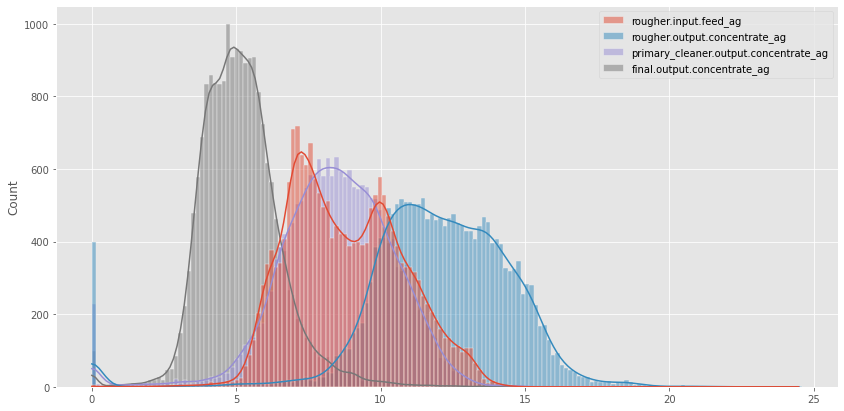

In [57]:
# воспользуюсь гистограммой seaborn чтобы исследовать технологический процесс концентрации серебра 
plt.figure(figsize = (14,7))
sns.histplot(data=concentrations_ag, kde = True, binwidth=0.15)
plt.show()

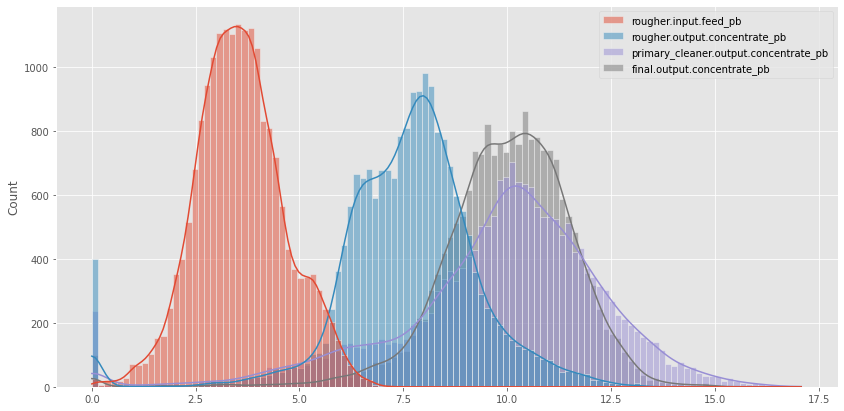

In [58]:
# воспользуюсь гистограммой seaborn чтобы исследовать технологический процесс концентрации свинца
plt.figure(figsize = (14,7))
sns.histplot(data=concentrations_pb, kde = True, binwidth=0.15)
plt.show()

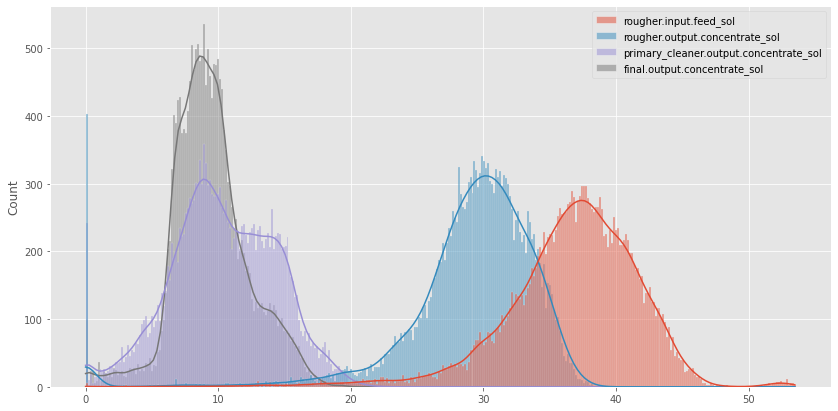

In [59]:
# воспользуюсь гистограммой seaborn чтобы исследовать технологический процесс концентрации солей
plt.figure(figsize = (14,7))
sns.histplot(data=concentrations_sol, kde = True, binwidth=0.15)
plt.show()

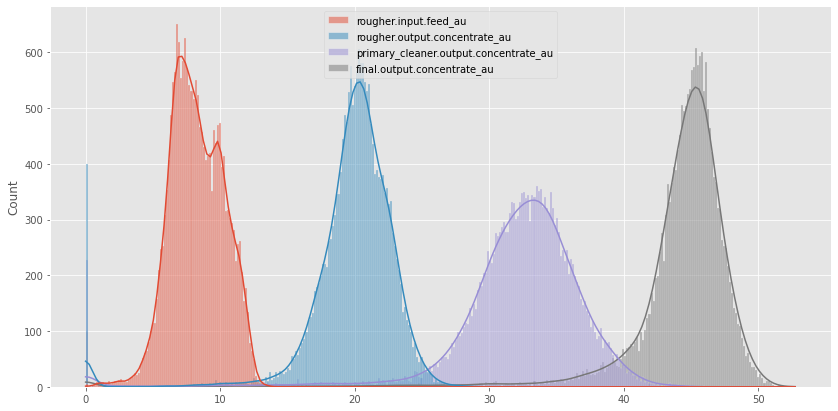

In [60]:
# воспользуюсь гистограммой seaborn чтобы исследовать технологический процесс концентрации золота
plt.figure(figsize = (14,7))
sns.histplot(data=concentrations_au, kde = True, binwidth=0.15)
plt.show()

*Представленная визуализация удобна для зрительного наблюдения и анализа. Что мы видим на гистограммах? Попробую ответить на этот вопрос используя описанный в параметрах технологических процесс. В гистограммах красным цветом выделена флотации параметров исходного сырья, флотации параметров концентрации продукта выделены синим цветом, первичная очистка параметров концентрации продукта отмечены фиолетовым цветом и наконец финальные характеристики параметров концентрации продукта - черным*

*Наиболее показательной картинкой и идеальной по очередности этапов получения нужной коенцентрации металла показаывает гистограмма концентрации золота. Мы видим, что золото постепенно увеличивается в концентрации с каждым этапом флотации и очистки. Возникает любопытный вопрос, почему так происходит? Попробую предположить, вся суть этапов флотации и очистки прежде всего направлена на извлечение наиболее ценного металла - золота, сам процесс был выработан для идеального извлечения золота.* 

*Любопытный вопрос, что происходит с концентрацией серебра? на этапах флотации создается впечателение что будет внушительное количество концентрации серебра в финальном виде, но гистограмма показывает, что серебро постепено к финальной очистке исчезает. Предполагаю, что это связано также с главной целью очистки, извлечению золота и фильтрации других ненужных металов, таких как серебро. Вероятно серебро остается в отвальных хвостах, которым уделяется отдельное внимание*

*Соль также как и серебро постепенно утрачивает концентрацию, совсем иначе обтоит дело со свинцом, этот метал очень устойчиво увеличивает концентрацию к этапам первичной очистки параметров концентрации и  финальным характеристикам параметров*

*На полученных графиках также можно увидеть много нулевых значений, данный вопрос требует внимания и в целом необходимо проверить данные на предмет наличия аномалий, поскольку аномалии могут привести к искаженным значениям при моделировании*

###  Анализ распределения размеров гранул сырья на обучающей и тестовой выборках

*Ранее в рамках проекта были созданы две выборки обучающая - df_train и  тестовая выборка - df_test. Преде всего интересует, что такое размер гранул сырья, согласно описанию данных это feed size. Осмотрев выборки  df_train  и df_test можно отметить, что такие параметры как rougher.input.feed_size и primary_cleaner.input.feed_size есть в двух выборках*

*Инстурментом для анализа распределения размеров гранул сырья на обучающей и тестовой выборках предполагаю использовать визуализацию. Если распределения будут сильно отличатmся друг от друга на картинках, оценка модели будет неправильной*

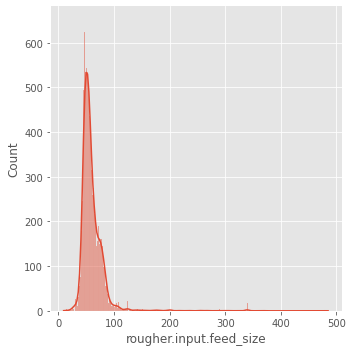

In [61]:
# cравним распределения df_train и df_test по таким индикаторам как rougher.input.feed_size и primary_cleaner.input.feed_size

sns.displot(df_train, x = 'rougher.input.feed_size', discrete = True, kde = True)
plt.show()

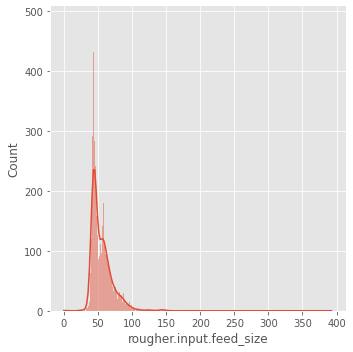

In [62]:
sns.displot(df_test, x = 'rougher.input.feed_size', discrete = True, kde = True)
plt.show()

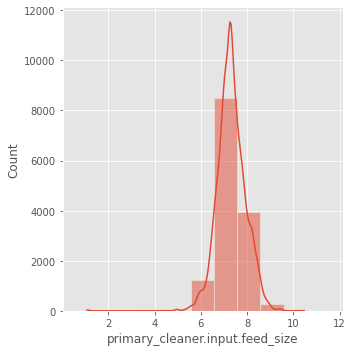

In [63]:
sns.displot(df_train, x = 'primary_cleaner.input.feed_size', discrete = True, kde = True)
plt.show()

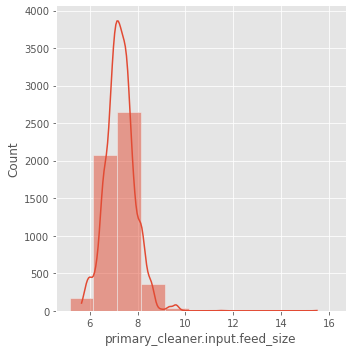

In [64]:
sns.displot(df_test, x = 'primary_cleaner.input.feed_size', discrete = True, kde = True)
plt.show()

**Вывод:**

*Выборка тенировочная имеет больше данных в отличии от тестовой выборки и это вполне естественно для подготовки данных к машинному обучению. Разница в данных наглядно заметно на графиках, но распределение данных осуществляется по схожему сценарию. Предполагаю, что можно продолжить иследовоание*

<AxesSubplot:>

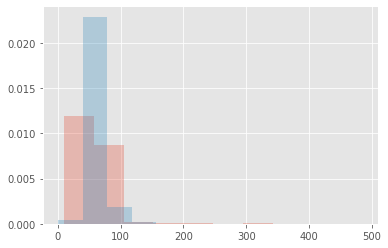

In [65]:
df_train['rougher.input.feed_size'].hist(density=True, alpha=.3)
df_test['rougher.input.feed_size'].hist(density=True, alpha=.3)

<AxesSubplot:>

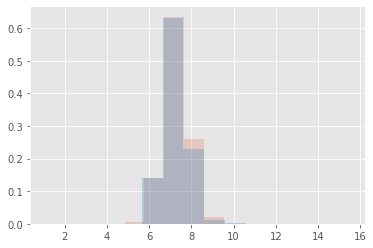

In [66]:
df_train['primary_cleaner.input.feed_size'].hist(density=True, alpha=.2)
df_test['primary_cleaner.input.feed_size'].hist(density=True, alpha=.3)

### Исследование суммарных концентраций

*Проведем исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для исследования будем использовать полную выборку*

In [67]:
def open(concentrate):
    display(concentrate.shape)

In [68]:
for concentrate in [df_train, df_test, df_full]:
    open(concentrate)

(14049, 55)

(5290, 55)

(19439, 87)

In [69]:
def all_metal_concentration(concentrate):
    concentrate['rougher_input_feed_all_metal'] = (concentrate['rougher.input.feed_au'] + 
                                                   concentrate['rougher.input.feed_ag'] + 
                                                   concentrate['rougher.input.feed_pb'])

    concentrate['rougher_output_concentrate_all_metal'] = (concentrate['rougher.output.concentrate_au'] + 
                                                           concentrate['rougher.output.concentrate_ag'] + 
                                                           concentrate['rougher.output.concentrate_pb'])

    concentrate['primary_output_concentrate_all_metal'] = (concentrate['primary_cleaner.output.concentrate_au'] + 
                                                           concentrate['primary_cleaner.output.concentrate_ag'] + 
                                                           concentrate['primary_cleaner.output.concentrate_pb'])


    concentrate['final_output_concentrate_all_metal'] = (concentrate['final.output.concentrate_au'] + 
                                                         concentrate['final.output.concentrate_ag'] + 
                                                         concentrate['final.output.concentrate_pb'])

    return concentrate

In [70]:
# создадим функцию
def vizualization(concentrate): 
    plt.figure(figsize=(12,9), dpi= 60)
    sns.kdeplot(concentrate['rougher_input_feed_all_metal'], shade=True, color="g", label="начальная", alpha=.7)
    sns.kdeplot(concentrate['rougher_output_concentrate_all_metal'], shade=True, color="deeppink", label="после флотации", alpha=.7)
    sns.kdeplot(concentrate['primary_output_concentrate_all_metal'], shade=True, color="dodgerblue", label="после первичной отчистки", alpha=.7)
    sns.kdeplot(concentrate['final_output_concentrate_all_metal'], shade=True, color="orange", label="финальная", alpha=.7)

    plt.title('Концентрация всех металлов, на этапах отчистки', fontsize=18)
    plt.legend()
    plt.show()

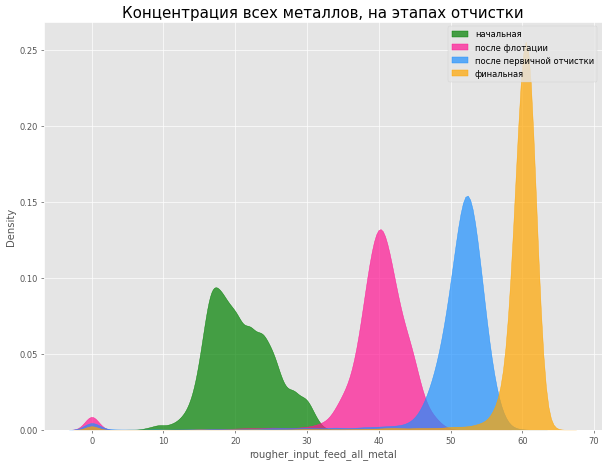

In [71]:
# использую функцию для просомтра полученой картины
df_full = all_metal_concentration(df_full)
vizualization(df_full)

*Анализируя полученный график визуализации концентрация всех металлов, на этапах отчистки можно заметить аномалии и выбросы в форме небольшого купола в нулевом значении, следовательно необходимо их устранить*

In [72]:
def cleaning(concentrate):
    before = concentrate.shape[0]
    concentrate = concentrate.query('1 < rougher_input_feed_all_metal')
    concentrate = concentrate.query('1 < rougher_output_concentrate_all_metal')
    concentrate = concentrate.query('1 < primary_output_concentrate_all_metal')
    concentrate = concentrate.query('1 < final_output_concentrate_all_metal')
    after = concentrate.shape[0]
    display('удалено {:.2%} строк'.format((before-after)/before))

    rougher_input_feed_all_metal_low = concentrate['rougher_input_feed_all_metal'].quantile(.025)
    rougher_input_feed_all_metal_up = concentrate['rougher_input_feed_all_metal'].quantile(.975)
    rougher_output_concentrate_all_metal_low = concentrate['rougher_output_concentrate_all_metal'].quantile(.025)
    rougher_output_concentrate_all_metal_up = concentrate['rougher_output_concentrate_all_metal'].quantile(.975)    
    primary_output_concentrate_all_metal_low = concentrate['primary_output_concentrate_all_metal'].quantile(.025)
    primary_output_concentrate_all_metal_up = concentrate['primary_output_concentrate_all_metal'].quantile(.975)    
    final_output_concentrate_all_metal_low = concentrate['final_output_concentrate_all_metal'].quantile(.025)
    final_output_concentrate_all_metal_up = concentrate['final_output_concentrate_all_metal'].quantile(.975)
    
    concentrate = concentrate.query('@rougher_input_feed_all_metal_low < rougher_input_feed_all_metal < @rougher_input_feed_all_metal_up')
    concentrate = concentrate.query('@rougher_output_concentrate_all_metal_low < rougher_output_concentrate_all_metal < @rougher_output_concentrate_all_metal_up')
    concentrate = concentrate.query('@primary_output_concentrate_all_metal_low < rougher_output_concentrate_all_metal < @primary_output_concentrate_all_metal_up')
    concentrate = concentrate.query('@final_output_concentrate_all_metal_low < final_output_concentrate_all_metal < @final_output_concentrate_all_metal_up')
    
    return concentrate

'удалено 3.69% строк'

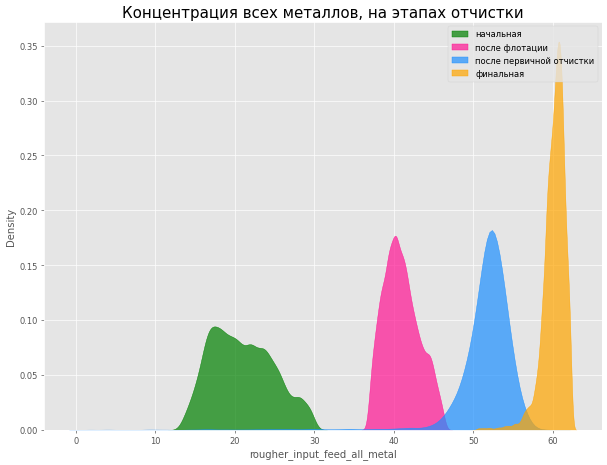

In [73]:
# применим функцию и очистим данные
df_full = cleaning(df_full)
vizualization(df_full)

**Очистка данных произошла, функция показала эффективность в работе**

In [74]:
features_to_join = df_full[['date','rougher_input_feed_all_metal', 'rougher_output_concentrate_all_metal',\
                            'primary_output_concentrate_all_metal', 'final_output_concentrate_all_metal']]

In [75]:
df_test = df_test.join(features_to_join.set_index('date'), on='date')

'удалено 17.84% строк'

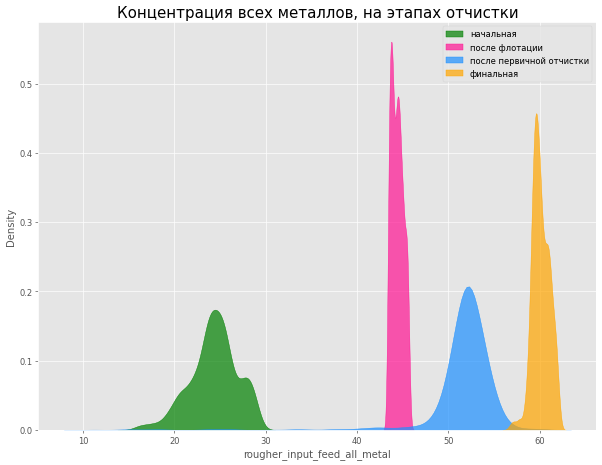

In [76]:
df_test = cleaning(df_test)
vizualization(df_test)

In [77]:
df_train = df_train.join(features_to_join.set_index('date'), on='date')

'удалено 26.71% строк'

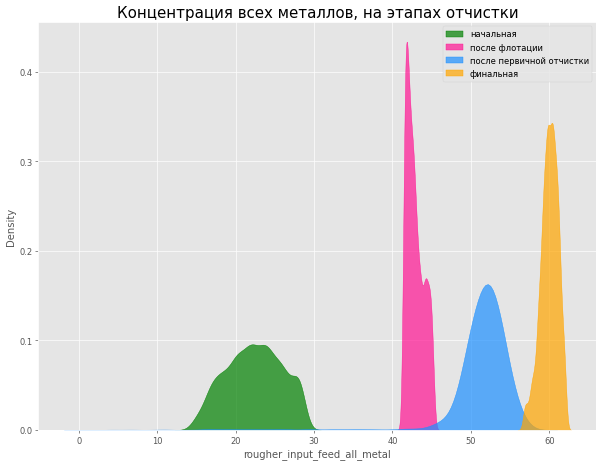

In [78]:
df_train = cleaning(df_train)
vizualization(df_train)

## Модель

In [79]:
def smape (target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что ты обошелся без циклов в функции выше
</div>

In [80]:
def final_smape (rougher, final):
    return 0.25 * rougher + 0.75 * final

In [81]:
target_rougher = df_train['rougher.output.recovery']
target_final = df_train['final.output.recovery']

features_train = df_train.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [82]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

In [83]:
model_dtr = DecisionTreeRegressor(random_state=666)
cross_val_score(model_dtr, features_train, target_rougher, cv=3).mean()

-1.5749897581992933

In [84]:
model_lr = LinearRegression()
cross_val_score(model_lr, features_train, target_rougher, cv=3).mean()

-3.588910013788196

In [85]:
model_cb = CatBoostRegressor(iterations=2, learning_rate=1, depth=3)
cross_val_score(model_cb, features_train, target_rougher, cv=3).mean()

0:	learn: 3.7132602	total: 50.7ms	remaining: 50.7ms
1:	learn: 3.4251411	total: 54.5ms	remaining: 0us
0:	learn: 5.3706240	total: 8.18ms	remaining: 8.18ms
1:	learn: 4.9084780	total: 15.9ms	remaining: 0us
0:	learn: 5.4767935	total: 3.54ms	remaining: 3.54ms
1:	learn: 4.6857173	total: 7.48ms	remaining: 0us


-0.4942129430649714

In [86]:
model_rf = RandomForestRegressor(random_state=666, n_estimators=10)
cross_val_score(model_rf, features_train, target_rougher, cv=3).mean()

-1.6100740071452997

**модель CatBoostRegressor демонстрирует лучший результат**

*Далее осуществим масштабирование признаков и подготовим фичи и целевые показатели*

In [87]:
target_rougher_test = df_test['rougher.output.recovery']
target_final_test = df_test['final.output.recovery']

features_test = df_test.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [88]:
scaler = StandardScaler()
scaler.fit(features_test)
features_test = scaler.transform(features_test)

**Пришло время обучить модель**

In [89]:
model_cb = CatBoostRegressor(iterations=2, learning_rate=1, depth=3)
model_cb_1 = CatBoostRegressor(iterations=2, learning_rate=1, depth=3)

cb_rougher = model_cb.fit(features_train, target_rougher)
cb_final = model_cb_1.fit(features_train, target_final)

cb_predictions_rougher = cb_rougher.predict(features_test)
cb_predictions_final = cb_final.predict(features_test)

0:	learn: 5.0657699	total: 3.99ms	remaining: 3.99ms
1:	learn: 4.6961590	total: 7.85ms	remaining: 0us
0:	learn: 7.5205013	total: 3.64ms	remaining: 3.64ms
1:	learn: 6.9420943	total: 7.31ms	remaining: 0us


*Посчитаем sMAPE для обоих признаков и итоговый*

In [90]:
smape_rougher = smape(target_rougher_test, cb_predictions_rougher)

In [91]:
smape_final = smape(target_final_test, cb_predictions_final)

In [92]:
final_smape(smape_rougher, smape_final)

5.887456224967773

*Осуществим оценку того как работает модель*

In [93]:
dummy = DummyRegressor(strategy = 'mean')
dummy_1 = DummyRegressor(strategy = 'mean')

dummy_rougher = dummy.fit(features_train, target_rougher)
dummy_predictions_rougher = dummy_rougher.predict(features_test)

dummy_final = dummy_1.fit(features_train, target_final)
dummy_predictions_final = dummy_final.predict(features_test)

In [94]:
smape_rougher_dummy = smape(target_rougher_test, dummy_predictions_rougher)

In [95]:
smape_final_dummy = smape(target_final_test, dummy_predictions_final)

In [96]:
final_smape(smape_rougher_dummy, smape_final_dummy)

6.474142795714306

### Вывод работы:

- Подготовлены данные;
- Проведен исследовательский анализ данных;
- Построена и обучена модель;
- Используя данные с параметрами добычи и очистки разработана Модель CatBoostRegressor, которая демонстрирует лучший результат и предсказывает коэффициент восстановления золота из золотосодержащей руды. 